In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

/home/bclayto4/miniforge/lib/python3.10/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [56]:


for key in data['1'].keys():
    print(key)

#print(data['1']['solution phases']['MSFL'])

solution phases
pure condensed phases
elements
temperature
pressure
integral Gibbs energy
entropy
enthalpy
heat capacity
functional norm
GEM iterations
# solution phases
# pure condensed phases


P3c1
LiU4F17_S1(s)
BeF2_Solid_I_Hi_quartz_(s
Li2BeF4_S1(s)
LiUF5_S1(s)
MSFL
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!


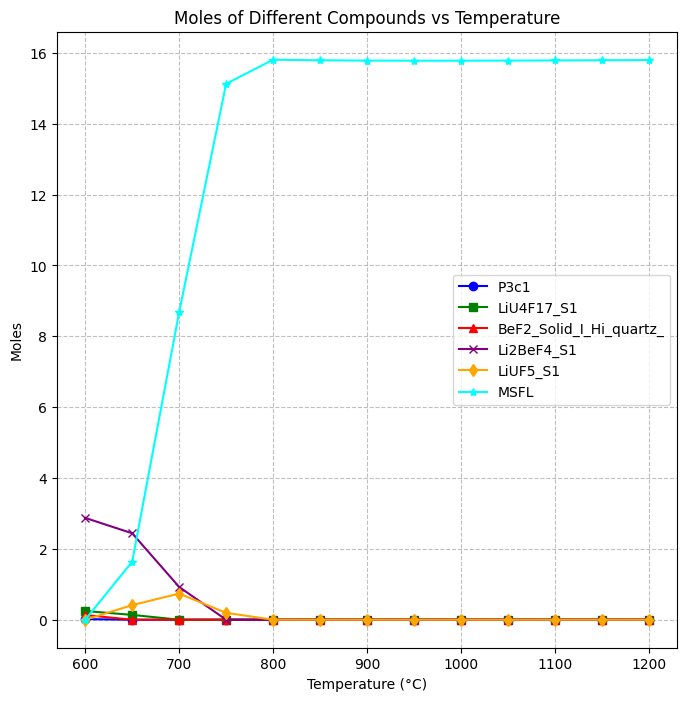

All Speciecs Accounted


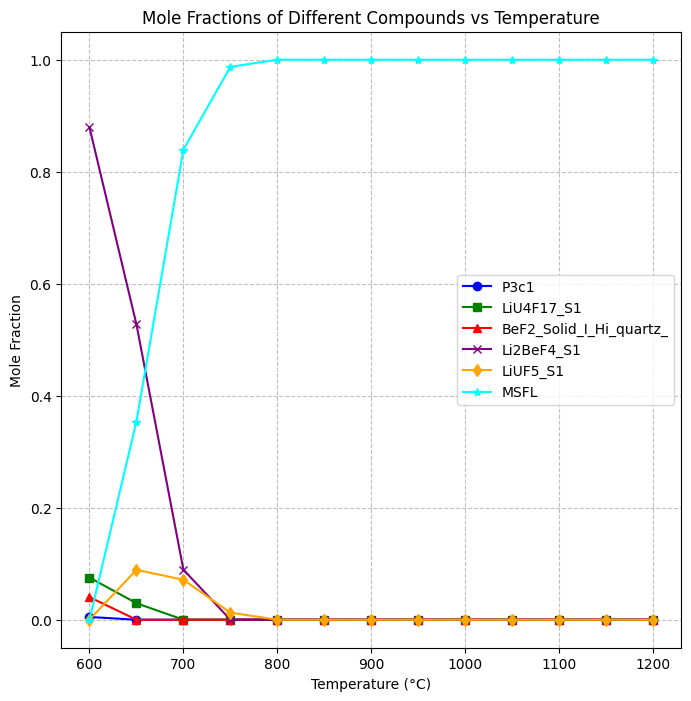

In [82]:
#First lets get the Temprature Data out
def readDatabase(datafile):
    f = open(datafile,)
    data = json.load(f)
    f.close()
    return data

data = readDatabase('SC_01_HypoF_thermout.json')

temperatures = [] 
Non_Zero_Species = []
'''This will be a list that stores lists of all non zero species, this will be useful as the more elements we add the more possible species we 
might have. There is no practical way I can think of to pull an plot the moles of each species,
The solution will be to use this list to determine the non zero species we should then pull data to graph'''

for k1 in data.keys():
    temperatures.append(data[k1]['temperature'])
    temp_it = []                                                                                                                          
    for k2 in data[k1]['solution phases'].keys():
        #print(k2)
        if data[k1]['solution phases'][k2]['moles'] == 0:
            pass
        else:
            temp_it.append(k2)
            #print(k2)

    for k3 in data[k1]['pure condensed phases'].keys():
        if data[k1]['pure condensed phases'][k3]['moles'] == 0:
            pass
        else:
            temp_it.append(k3)
            #print(k3)
    Non_Zero_Species.append(temp_it)
            
    #print(Non_Zero_Species)
    temp_it = []
    
#print(Non_Zero_Species)
#print(temperatures)

def find_Species_of_Intrest(Non_Zero_Species):    
    # Use a set to store unique values
    unique_strings = set()
    
    # Loop through the list of lists
    for sublist in Non_Zero_Species:
        for item in sublist:
            unique_strings.add(item)
    
    # Print the unique strings
    for unique_item in unique_strings:
        print(unique_item)
    return unique_strings

ex1 = find_Species_of_Intrest(Non_Zero_Species)
print('!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!') 

#Now That we know which Species actualy have something present, we can create our Mole Phase Plots 

moles_P3c1 = []
moles_LiU4F17_S1  = []
moles_BeF2_Solid_I_Hi_quartz_  = []
moles_Li2BeF4_S1  = []
moles_LiUF5_S1  = []
moles_MSFL  = []

for k1 in data.keys():
    moles_P3c1.append(data[k1]['solution phases']['P3c1']['moles'])
    moles_LiU4F17_S1.append(data[k1]['pure condensed phases']['LiU4F17_S1(s)']['moles'])
    moles_BeF2_Solid_I_Hi_quartz_.append(data[k1]['pure condensed phases']['BeF2_Solid_I_Hi_quartz_(s']['moles'])
    moles_Li2BeF4_S1.append(data[k1]['pure condensed phases']['Li2BeF4_S1(s)']['moles'])
    moles_LiUF5_S1.append(data[k1]['pure condensed phases']['LiUF5_S1(s)']['moles'])
    moles_MSFL.append(data[k1]['solution phases']['MSFL']['moles'])

#print(moles_P3c1)

plt.figure(figsize=(8, 8))

plt.plot(temperatures, moles_P3c1, label='P3c1', color='blue', marker='o')
plt.plot(temperatures, moles_LiU4F17_S1, label='LiU4F17_S1', color='green', marker='s')
plt.plot(temperatures, moles_BeF2_Solid_I_Hi_quartz_, label='BeF2_Solid_I_Hi_quartz_', color='red', marker='^')
plt.plot(temperatures, moles_Li2BeF4_S1, label='Li2BeF4_S1', color='purple', marker='x')
plt.plot(temperatures, moles_LiUF5_S1, label='LiUF5_S1', color='orange', marker='d')
plt.plot(temperatures, moles_MSFL, label='MSFL', color='cyan', marker='*')

# Adding gridlines
plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Moles')
plt.title('Moles of Different Compounds vs Temperature')

# Adding legend
plt.legend()

# Show plot
plt.show()


total_mol = []

for k1 in data.keys():
    mol_it = 0
    for k2 in data[k1]['solution phases'].keys():
        mol_it += data[k1]['solution phases'][k2]['moles']
    for k3 in data[k1]['pure condensed phases'].keys():
        mol_it += data[k1]['pure condensed phases'][k3]['moles']
    total_mol.append(mol_it)
#print(total_mol)

species_check = []
for i in range(len(moles_P3c1)):
    mol_sum_check = 0
    #print(i)
    mol_sum_check += moles_P3c1[i]
    mol_sum_check += moles_LiU4F17_S1[i]
    mol_sum_check += moles_BeF2_Solid_I_Hi_quartz_[i]
    mol_sum_check += moles_Li2BeF4_S1[i]
    mol_sum_check += moles_LiUF5_S1[i]
    mol_sum_check += moles_MSFL[i]
    species_check.append(mol_sum_check)

sca = np.array(species_check)
tma = np.array(total_mol)
dsc_check = sca-tma

if np.sum(dsc_check) != 0:
    print('WARNING: Species is Missing')
    print(dsc_check)
else:
    print("All Speciecs Accounted")

moles_P3c1 = np.array(moles_P3c1)
moles_LiU4F17_S1  = np.array(moles_LiU4F17_S1)
moles_BeF2_Solid_I_Hi_quartz_  = np.array(moles_BeF2_Solid_I_Hi_quartz_)
moles_Li2BeF4_S1  = np.array(moles_Li2BeF4_S1)
moles_LiUF5_S1  = np.array(moles_LiUF5_S1)
moles_MSFL  = np.array(moles_MSFL)

for i in range(len(moles_P3c1)):
    
    mol_frac_P3c1 = moles_P3c1/tma
    mol_frac_LiU4F17_S1 = moles_LiU4F17_S1/tma
    mol_frac_BeF2_Solid_I_Hi_quartz_  = moles_BeF2_Solid_I_Hi_quartz_/tma
    mol_frac_Li2BeF4_S1  = moles_Li2BeF4_S1/tma
    mol_frac_LiUF5_S1  = moles_LiUF5_S1/tma
    mol_frac_MSFL  = moles_MSFL/tma

#print(mol_frac_MSFL)

import numpy as np
import matplotlib.pyplot as plt

# Assuming tma is defined
tma = 100  # Replace this with your actual total moles of all species value

plt.figure(figsize=(8, 8))  # Make the plot square

plt.plot(temperatures, mol_frac_P3c1, label='P3c1', color='blue', marker='o')
plt.plot(temperatures, mol_frac_LiU4F17_S1, label='LiU4F17_S1', color='green', marker='s')
plt.plot(temperatures, mol_frac_BeF2_Solid_I_Hi_quartz_, label='BeF2_Solid_I_Hi_quartz_', color='red', marker='^')
plt.plot(temperatures, mol_frac_Li2BeF4_S1, label='Li2BeF4_S1', color='purple', marker='x')
plt.plot(temperatures, mol_frac_LiUF5_S1, label='LiUF5_S1', color='orange', marker='d')
plt.plot(temperatures, mol_frac_MSFL, label='MSFL', color='cyan', marker='*')

# Adding gridlines
plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Mole Fraction')
plt.title('Mole Fractions of Different Compounds vs Temperature')

# Adding legend
plt.legend()

# Show plot
plt.show()


In [83]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

def readDatabase(datafile):
    with open(datafile) as f:
        data = json.load(f)
    return data

def find_Species_of_Intrest(Non_Zero_Species):    
    unique_strings = set()
    for sublist in Non_Zero_Species:
        for item in sublist:
            unique_strings.add(item)
    return unique_strings

def process_json_file(filepath):
    # Get base filename for output files
    base_filename = os.path.splitext(os.path.basename(filepath))[0]
    
    # Create output text file
    output_txt = f"{base_filename}_print.txt"
    with open(output_txt, 'w') as f_out:
        # Redirect print statements to file
        def custom_print(*args, **kwargs):
            print(*args, **kwargs)  # Print to console
            print(*args, **kwargs, file=f_out)  # Print to file
        
        data = readDatabase(filepath)
        
        temperatures = []
        Non_Zero_Species = []
        
        for k1 in data.keys():
            temperatures.append(data[k1]['temperature'])
            temp_it = []
            
            for k2 in data[k1]['solution phases'].keys():
                if data[k1]['solution phases'][k2]['moles'] != 0:
                    temp_it.append(k2)
            
            for k3 in data[k1]['pure condensed phases'].keys():
                if data[k1]['pure condensed phases'][k3]['moles'] != 0:
                    temp_it.append(k3)
                    
            Non_Zero_Species.append(temp_it)
        
        # Find and print species of interest
        ex1 = find_Species_of_Intrest(Non_Zero_Species)
        custom_print('Species of Interest:')
        for species in ex1:
            custom_print(species)
        custom_print('!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!')
        
        # Extract moles data
        moles_data = {
            'P3c1': [],
            'LiU4F17_S1': [],
            'BeF2_Solid_I_Hi_quartz_': [],
            'Li2BeF4_S1': [],
            'LiUF5_S1': [],
            'MSFL': []
        }
        
        for k1 in data.keys():
            moles_data['P3c1'].append(data[k1]['solution phases']['P3c1']['moles'])
            moles_data['LiU4F17_S1'].append(data[k1]['pure condensed phases']['LiU4F17_S1(s)']['moles'])
            moles_data['BeF2_Solid_I_Hi_quartz_'].append(data[k1]['pure condensed phases']['BeF2_Solid_I_Hi_quartz_(s']['moles'])
            moles_data['Li2BeF4_S1'].append(data[k1]['pure condensed phases']['Li2BeF4_S1(s)']['moles'])
            moles_data['LiUF5_S1'].append(data[k1]['pure condensed phases']['LiUF5_S1(s)']['moles'])
            moles_data['MSFL'].append(data[k1]['solution phases']['MSFL']['moles'])
        
        # Plot moles
        plt.figure(figsize=(8, 8))
        colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
        markers = ['o', 's', '^', 'x', 'd', '*']
        
        for (species, moles), color, marker in zip(moles_data.items(), colors, markers):
            plt.plot(temperatures, moles, label=species, color=color, marker=marker)
        
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Moles')
        plt.title('Moles of Different Compounds vs Temperature')
        plt.legend()
        plt.savefig(f"{base_filename}_moles.png")
        plt.close()
        
        # Calculate total moles and check species
        total_mol = []
        for k1 in data.keys():
            mol_it = 0
            for k2 in data[k1]['solution phases'].keys():
                mol_it += data[k1]['solution phases'][k2]['moles']
            for k3 in data[k1]['pure condensed phases'].keys():
                mol_it += data[k1]['pure condensed phases'][k3]['moles']
            total_mol.append(mol_it)
        
        # Convert to numpy arrays for calculations
        moles_arrays = {k: np.array(v) for k, v in moles_data.items()}
        total_mol = np.array(total_mol)
        
        # Species check
        species_check = sum(moles_arrays.values())
        dsc_check = species_check - total_mol
        
        if np.sum(dsc_check) != 0:
            custom_print('WARNING: Species is Missing')
            custom_print(dsc_check)
        else:
            custom_print("All Species Accounted")
        
        # Calculate and plot mole fractions
        plt.figure(figsize=(8, 8))
        
        for (species, moles), color, marker in zip(moles_arrays.items(), colors, markers):
            mol_frac = moles / total_mol
            plt.plot(temperatures, mol_frac, label=species, color=color, marker=marker)
        
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Mole Fraction')
        plt.title('Mole Fractions of Different Compounds vs Temperature')
        plt.legend()
        plt.savefig(f"{base_filename}_molfrac.png")
        plt.close()

def main():
    # Process all JSON files in the current directory
    for filename in os.listdir('.'):
        if filename.endswith('.json'):
            print(f"\nProcessing {filename}...")
            process_json_file(filename)
            print(f"Completed processing {filename}")

if __name__ == "__main__":
    main()


Processing SC_01_HyperF_thermout.json...
Species of Interest:
Be_S1(s)
BeF2_Solid_I_Hi_quartz_(s
Li2BeF4_S1(s)
U_S2(s2)
MSFL
U_S1(s)
U_S3(s3)
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!
[-1.         -1.00000174 -1.00000028 -1.00000237 -1.00000414 -1.00000672
 -1.00001022 -1.0000147  -1.00001994 -1.00002609 -1.00003233 -1.00003916
 -1.00004648]
Completed processing SC_01_HyperF_thermout.json

Processing SC_01_HypoF_thermout.json...
Species of Interest:
P3c1
LiU4F17_S1(s)
BeF2_Solid_I_Hi_quartz_(s
Li2BeF4_S1(s)
LiUF5_S1(s)
MSFL
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!
All Species Accounted
Completed processing SC_01_HypoF_thermout.json

Processing SC_10_HyperF_thermout.json...
Species of Interest:
P3c1
LiU4F17_S1(s)
BeF2_Solid_I_Hi_quartz_(s
Li2BeF4_S1(s)
LiUF5_S1(s)
MSFL
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!
All Species Accounted
Completed processing

In [84]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

def readDatabase(datafile):
    with open(datafile) as f:
        data = json.load(f)
    return data

def find_Species_of_Interest(Non_Zero_Species):    
    unique_strings = set()
    for sublist in Non_Zero_Species:
        for item in sublist:
            unique_strings.add(item)
    return unique_strings

def get_species_data(data, species_name, is_solution_phase):
    """Extract moles data for a given species from the data structure"""
    moles = []
    for k1 in data.keys():
        if is_solution_phase:
            moles.append(data[k1]['solution phases'][species_name]['moles'])
        else:
            moles.append(data[k1]['pure condensed phases'][species_name]['moles'])
    return moles

def process_json_file(filepath):
    base_filename = os.path.splitext(os.path.basename(filepath))[0]
    
    output_txt = f"{base_filename}_print.txt"
    with open(output_txt, 'w') as f_out:
        def custom_print(*args, **kwargs):
            print(*args, **kwargs)
            print(*args, **kwargs, file=f_out)
        
        data = readDatabase(filepath)
        
        temperatures = []
        Non_Zero_Species = []
        
        # First pass: collect all species and temperatures
        for k1 in data.keys():
            temperatures.append(data[k1]['temperature'])
            temp_it = []
            
            # Check solution phases
            for k2 in data[k1]['solution phases'].keys():
                if data[k1]['solution phases'][k2]['moles'] != 0:
                    temp_it.append((k2, True))  # True indicates solution phase
            
            # Check pure condensed phases
            for k3 in data[k1]['pure condensed phases'].keys():
                if data[k1]['pure condensed phases'][k3]['moles'] != 0:
                    temp_it.append((k3, False))  # False indicates pure condensed phase
                    
            Non_Zero_Species.append(temp_it)
        
        # Get unique species with their phase type
        all_species = set()
        for sublist in Non_Zero_Species:
            for item in sublist:
                all_species.add(item)
        
        # Print species of interest
        custom_print('Species of Interest:')
        for species, is_solution in all_species:
            custom_print(f"{species} ({'solution' if is_solution else 'condensed'} phase)")
        custom_print('!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!')
        
        # Extract moles data for all species
        moles_data = {}
        for species, is_solution in all_species:
            species_key = species.replace('(s)', '').replace('(s2)', '').replace('(s3)', '')
            if is_solution:
                moles_data[species_key] = get_species_data(data, species, True)
            else:
                moles_data[species_key] = get_species_data(data, species, False)
        
        # Plot moles
        plt.figure(figsize=(10, 8))
        colors = plt.cm.tab20(np.linspace(0, 1, len(moles_data)))
        markers = ['o', 's', '^', 'x', 'd', '*', 'v', '<', '>', 'p', 'h', '8', 'D', 'P']
        
        for (species, moles), color, marker in zip(moles_data.items(), colors, markers * 2):  # * 2 in case we have many species
            plt.plot(temperatures, moles, label=species, color=color, marker=marker, markersize=6)
        
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Moles')
        plt.title('Moles of Different Compounds vs Temperature')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{base_filename}_moles.png", bbox_inches='tight', dpi=300)
        plt.close()
        
        # Calculate total moles
        total_mol = []
        for k1 in data.keys():
            mol_it = 0
            for k2 in data[k1]['solution phases'].keys():
                mol_it += data[k1]['solution phases'][k2]['moles']
            for k3 in data[k1]['pure condensed phases'].keys():
                mol_it += data[k1]['pure condensed phases'][k3]['moles']
            total_mol.append(mol_it)
        
        # Convert to numpy arrays
        moles_arrays = {k: np.array(v) for k, v in moles_data.items()}
        total_mol = np.array(total_mol)
        
        # Species check
        species_check = sum(moles_arrays.values())
        dsc_check = species_check - total_mol
        
        if np.abs(dsc_check).max() > 1e-10:  # Using small threshold for floating point errors
            custom_print('WARNING: Numerical discrepancy detected')
            custom_print(f"Maximum discrepancy: {np.abs(dsc_check).max()}")
        else:
            custom_print("All Species Accounted")
        
        # Plot mole fractions
        plt.figure(figsize=(10, 8))
        
        for (species, moles), color, marker in zip(moles_arrays.items(), colors, markers * 2):
            mol_frac = moles / total_mol
            plt.plot(temperatures, mol_frac, label=species, color=color, marker=marker, markersize=6)
        
        plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Mole Fraction')
        plt.title('Mole Fractions of Different Compounds vs Temperature')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{base_filename}_molfrac.png", bbox_inches='tight', dpi=300)
        plt.close()

def main():
    for filename in os.listdir('.'):
        if filename.endswith('.json'):
            print(f"\nProcessing {filename}...")
            process_json_file(filename)
            print(f"Completed processing {filename}")

if __name__ == "__main__":
    main()
    


Processing SC_01_HyperF_thermout.json...
Species of Interest:
Be_S1(s) (condensed phase)
U_S1(s) (condensed phase)
BeF2_Solid_I_Hi_quartz_(s (condensed phase)
Li2BeF4_S1(s) (condensed phase)
U_S3(s3) (condensed phase)
U_S2(s2) (condensed phase)
MSFL (solution phase)
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!
All Species Accounted
Completed processing SC_01_HyperF_thermout.json

Processing SC_01_HypoF_thermout.json...
Species of Interest:
BeF2_Solid_I_Hi_quartz_(s (condensed phase)
P3c1 (solution phase)
Li2BeF4_S1(s) (condensed phase)
LiUF5_S1(s) (condensed phase)
LiU4F17_S1(s) (condensed phase)
MSFL (solution phase)
!!! Remember to Check that Nonzero Species Match the Variables used in Phase Plots !!!
All Species Accounted
Completed processing SC_01_HypoF_thermout.json

Processing SC_10_HyperF_thermout.json...
Species of Interest:
BeF2_Solid_I_Hi_quartz_(s (condensed phase)
P3c1 (solution phase)
Li2BeF4_S1(s) (condensed phase)
LiUF5_S1(s) (c